In [1]:
import numpy as np

from primitives.kernels import SquaredExponentialKernel, WhiteKernel
from primitives.means import ZeroMeanFunction
from models import NonGaussianProcess, GaussianProcess

from primitives.levyprocess import GammaProcess
from primitives.levyprocess import TemperedStableProcess

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# SquaredExponentialKernel generation:
kernel_params = {"sigma":1., "length_scale":5.}
kernel_function = SquaredExponentialKernel(**kernel_params)
noise_kernel_function = WhiteKernel(sigma=0.1)

# Mean function selection:
mean_function = ZeroMeanFunction()

In [3]:
# # Gamma subordinator:
# gamma_process_params = {"beta":5., "C":5.}
# subordinator = GammaProcess(**gamma_process_params)

# Tempered Stable subordinator:
TS_process_params = {"alpha":0.7, "beta":0.01, "C":1.}
subordinator = TemperedStableProcess(**TS_process_params)

Residual approximation mode is set to Gaussian approximation.


In [4]:
# Non Gaussian process model:
NGP_generator = NonGaussianProcess(mean_function, kernel_function, noise_kernel_function, subordinator)

In [9]:
N = 1000
X = np.linspace(start=0., stop=10., num=N).reshape(-1, 1)
fX, y = NGP_generator.sample(X, size=1)

In [10]:
mean, cov, log_marginal_likelihood = NGP_generator.posterior_density(y, X, X)

f_std = np.sqrt(np.diag(cov))
y_std = np.sqrt(np.diag(cov + noise_kernel_function(X)))

In [11]:
log_marginal_likelihood.item()

751.0843540345611

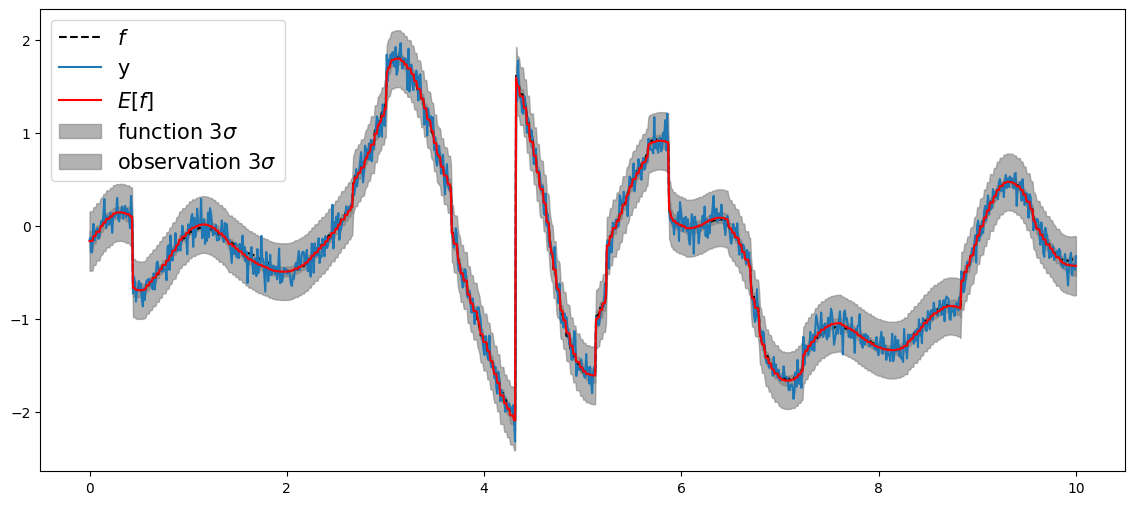

In [12]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(X, fX, label=r'$f$', color='black', ls='--')
ax.plot(X, y, label='y')

ax.plot(X, mean, label=r'$E[f]$', color='red')

ax.fill_between(X.ravel(), mean.ravel(), mean.ravel() + 3 * f_std, alpha=0.6, color='grey', label=r'function 3$\sigma$')
ax.fill_between(X.ravel(), mean.ravel(), mean.ravel() - 3 * f_std, alpha=0.6, color='grey')

ax.fill_between(X.ravel(), mean.ravel(), mean.ravel() + 3 * y_std, alpha=0.6, color='grey', label=r'observation 3$\sigma$')
ax.fill_between(X.ravel(), mean.ravel(), mean.ravel() - 3 * y_std, alpha=0.6, color='grey')

ax.legend(fontsize=15)
plt.show()

In [13]:
pd.DataFrame.from_dict({"X":X.flatten(), "fX":fX.flatten(), "y":y.flatten()}).to_csv(path_or_buf="datasets/ngp_ts/data.csv", header=True)

In [14]:
pd.DataFrame.from_dict({"t_series":NGP_generator.subordinator.t_series, "x_series":NGP_generator.subordinator.x_series}).to_csv(path_or_buf="datasets/ngp_ts/subordinator_data.csv", header=True)